In [3]:
# Websites to scrape
# https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/index.html

time: 744 µs


#SETUP

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
!pip install ipython-autotime
%load_ext autotime





time: 2.92 ms


In [2]:
# Import Libraries
import os
import urllib
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]
time: 197 ms


In [11]:
START_URL = "https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/index.html"

URL_HEAD_DICT = {
            'Market Capitalisation':'https://www.moneycontrol.com/stocks/marketinfo/marketcap/',
            'Net Sales':'https://www.moneycontrol.com/stocks/marketinfo/netsales/',
            'Net Profit':'https://www.moneycontrol.com/stocks/marketinfo/netprofit/',
            'Total Assets':'https://www.moneycontrol.com/stocks/marketinfo/totassets/',
            'Other Income':'https://www.moneycontrol.com/stocks/marketinfo/othinc/',
            'Interest':'https://www.moneycontrol.com/stocks/marketinfo/interest/',
            'Tax':'https://www.moneycontrol.com/stocks/marketinfo/tax/',
            'EPS':'https://www.moneycontrol.com/stocks/marketinfo/eps/',
            'Sundry Debtors':'https://www.moneycontrol.com/stocks/marketinfo/sdrs/',
            'Cash/Bank':'https://www.moneycontrol.com/stocks/marketinfo/cashbank/',
            'Inventory':'https://www.moneycontrol.com/stocks/marketinfo/inventory/',
            'Debt':'https://www.moneycontrol.com/stocks/marketinfo/debt/',
            'Contingent Liabilities':'https://www.moneycontrol.com/stocks/marketinfo/contliab/'
}

MARKETS = {'NSE':'nse/','BSE':'bse/'}

# try:
#   os.mkdir('Plots')
# except:
#   pass


time: 14.5 ms


In [12]:
def fetch_links(URL,URL_HEAD =URL_HEAD_DICT['Market Capitalisation'],MARKET=MARKETS['BSE']):
  page = requests.get(URL)
  soup = BeautifulSoup(page.text,"html.parser")

  links = soup.find("div",attrs={'class':'lftmenu'}).ul
  link = links.findChildren('a')
  Title = []
  Link = []
  Field = []
  # website_link= 'https://www.moneycontrol.com'
  for a in link:
    Link.append(URL_HEAD+MARKET)
    # Link.append(website_link + a['href'])
    Field.append(a['href'].split('/')[-1])
    Title.append(a.string)

  link_df = pd.DataFrame(columns=['Title','Link'])
  link_df['Title'] = Title
  link_df['Link'] = Link
  link_df['Field'] = Field
  link_df.Field[0] = 'index.html'

  link_df['Link'] = link_df['Link'] + link_df['Field']


  return link_df

link_df = fetch_links(START_URL)
link_df
# 

,Title,Link,Field
0,Top 100,https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/index.html,index.html
1,Abrasives,https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/abrasives.html,abrasives.html
2,Aerospace & Defence,https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/aerospace-defence.html,aerospace-defence.html
3,Agriculture,https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/agriculture.html,agriculture.html
4,Air Conditioners,https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/air-conditioners.html,air-conditioners.html
5,Airlines,https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/airlines.html,airlines.html
6,Aluminium & Aluminium Products,https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/aluminium-aluminium-products.html,aluminium-aluminium-products.html
7,Amusement Parks/Recreation/Club,https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/amusement-parksrecreationclub.html,amusement-parksrecreationclub.html
8,Aquaculture,https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/aquaculture.html,aquaculture.html
9,Auto Ancillaries,https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/auto-ancillaries.html,auto-ancillaries.html


time: 590 ms


In [13]:
def fetch_tables(df,index):
  page = requests.get(df['Link'][index])
  print(df['Link'][index])
  soup = BeautifulSoup(page.text,"html.parser")
  table_heading = soup.find_all('th',attrs={'class':'brdrgtgry'})
  sr_index = -1
  # try:
  table_rows = soup.find_all('td',attrs={'class':'brdrgtgry'})
  cols=[]
  cols_vals=[]
  for i in table_heading:
    cols.append(i.text)
    if (i.text == 'Company Name' or i.text == 'Company'):
      comapny_index = table_heading.index(i)
    if (i.text == 'Sr'):
      sr_index = table_heading.index(i)
    cols_vals.append([])


  Company_Name = []
  Last_Price = []
  Percent_change = []
  High_52_week = []
  Low_52_week = []
  Market_Cap = []

  table_heading_len = len(table_heading)
  table_rows_len = len(table_rows)


  for i in range(0,table_rows_len,table_heading_len):
      for j in range(0,table_heading_len):
        if(j==comapny_index):
          cols_vals[(i+j)%table_heading_len].append(table_rows[i+j].text.splitlines()[0])
        else:
          cols_vals[(i+j)%table_heading_len].append(table_rows[i+j].text)

  df = pd.DataFrame(columns=cols)
  for i in range(table_heading_len):
    df[cols[i]] = cols_vals[i]

  for i in range(table_heading_len):
    if i == comapny_index:
      df[cols[i]]= df[cols[i]]
    else:
      df[cols[i]]= df[cols[i]].str.replace(',', '').replace('',np.nan).astype('float')
      

  if sr_index == -1:
    pass
  else:
    df.drop(cols[sr_index], axis = 1,inplace=True) 
  return [df,cols]

  # except:
    # print('No Data Found')
    # return -1

li = fetch_tables(link_df,0)
if li == -1:
  print('No data')
else:
  df = li[0]
  cols = li[1]

  df.dtypes


https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/index.html


Company Name           object
Last Price            float64
% Chg                 float64
52 wkHigh             float64
52 wkLow              float64
Market Cap(Rs. cr)    float64
dtype: object

time: 871 ms


# Analysis

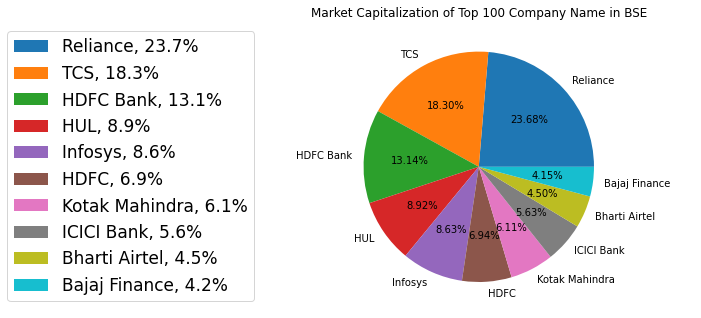

time: 189 ms


In [16]:
def mcap_pie(df,param_1,param_2):
  top_10 = df.sort_values(param_2,ascending=False).head(10)
  labels = top_10[param_1]
  values = top_10[param_2]

  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.axis('equal')
  ax.pie(values, labels = labels,autopct='%1.2f%%')
  ax.set_title(f'Market Capitalization of Top {df.shape[0]} {cols[0]} in BSE')
  ax.legend(
      labels=['%s, %1.1f%%' % (
          l, (float(s) / values.sum()) * 100) for l, s in zip(labels, values)],
      prop={'size': 17},
      bbox_to_anchor=(0.0, 1),
  )

  plt.show();

mcap_pie(df,cols[0],cols[-1])

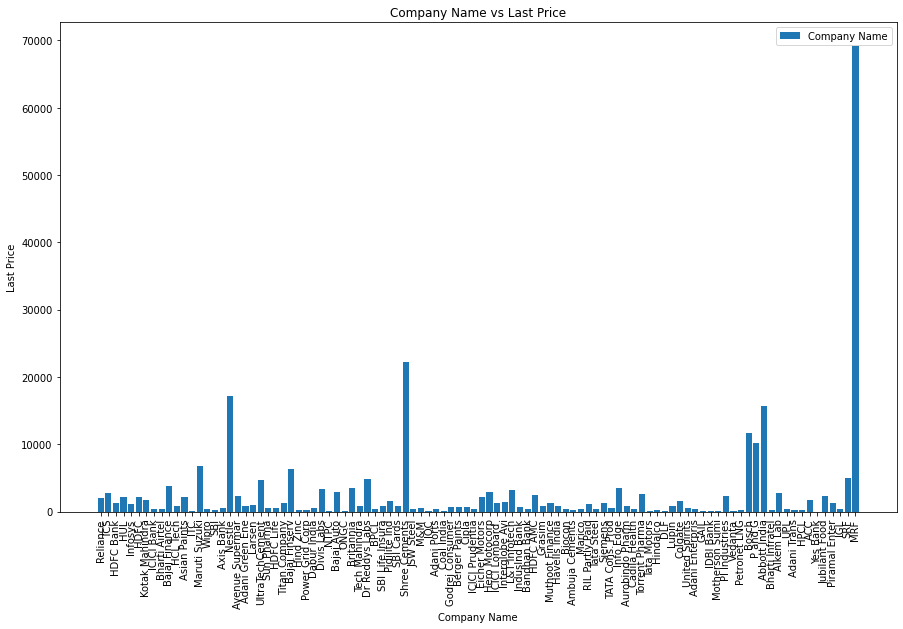

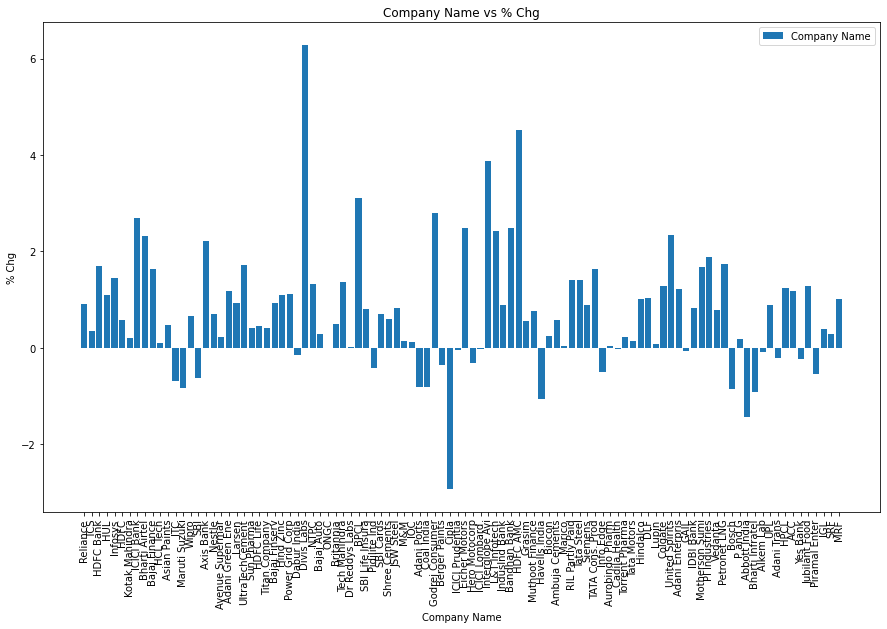

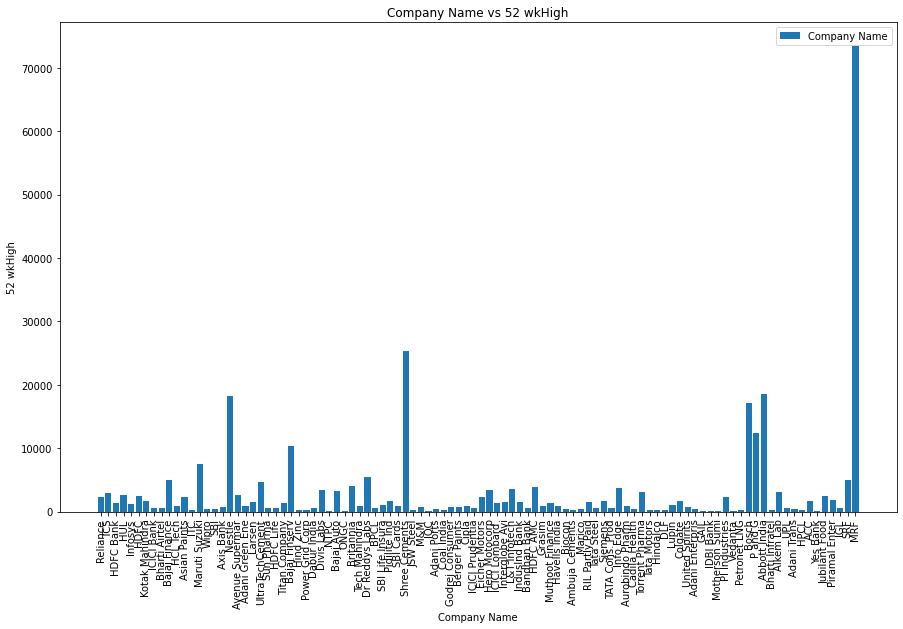

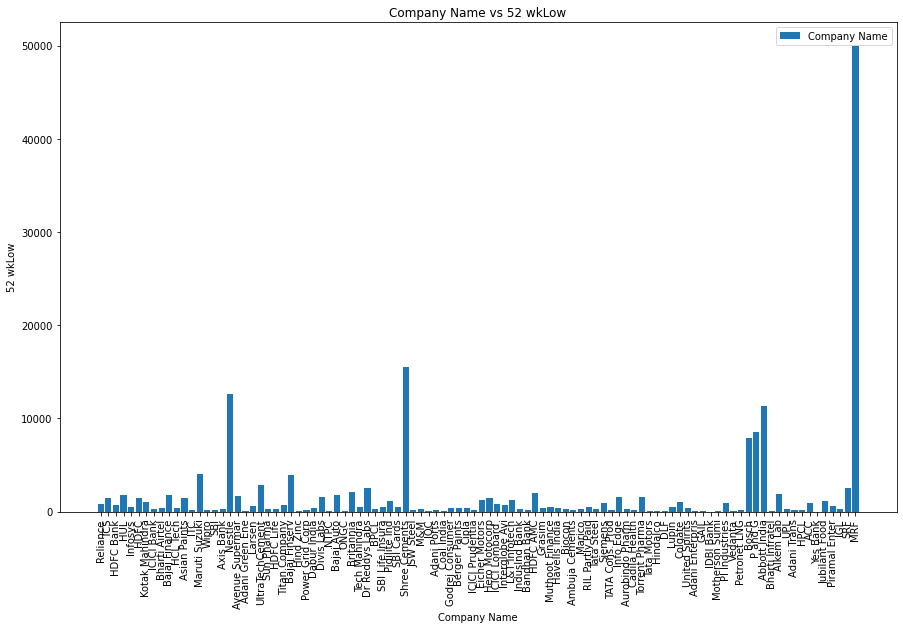

time: 7.18 s


In [20]:
def plot_bar(df,param_1,param_2):
  labels = df[param_1]
  plt.figure(figsize = (15,9))
  plt.xlabel(f'{param_1}')
  plt.ylabel(f'{param_2}')
  plt.title(f'{param_1} vs {param_2}')
  plt.bar(df[param_1], df[param_2])
  plt.xticks(np.arange(df.shape[0]),labels=labels,rotation='90')
  plt.legend(labels = [param_1,param_2]) 

  plt.savefig(f'Plots/{param_1}_{param_2}')

plot_bar(df,cols[0],cols[1])
plot_bar(df,cols[0],cols[2])
plot_bar(df,cols[0],cols[3])
plot_bar(df,cols[0],cols[4])



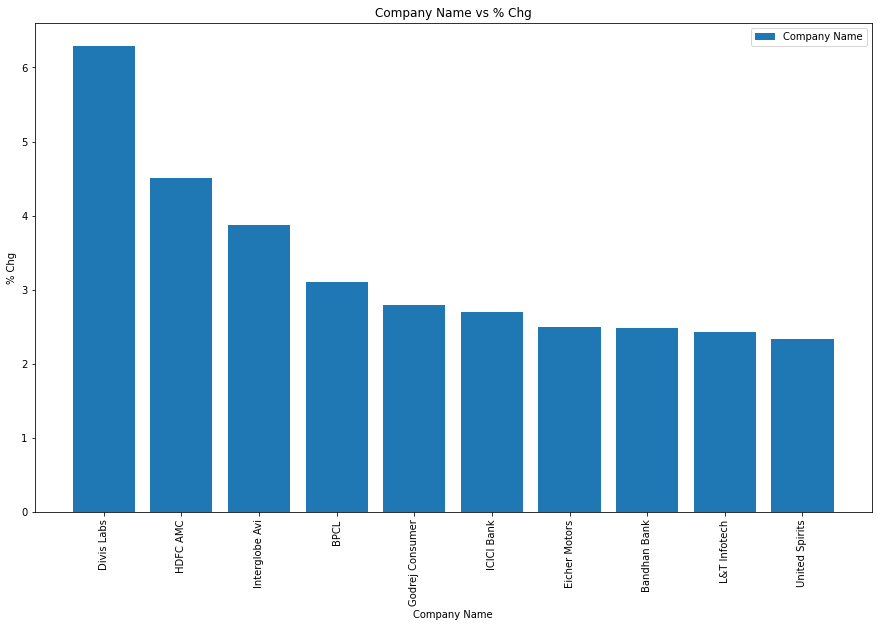

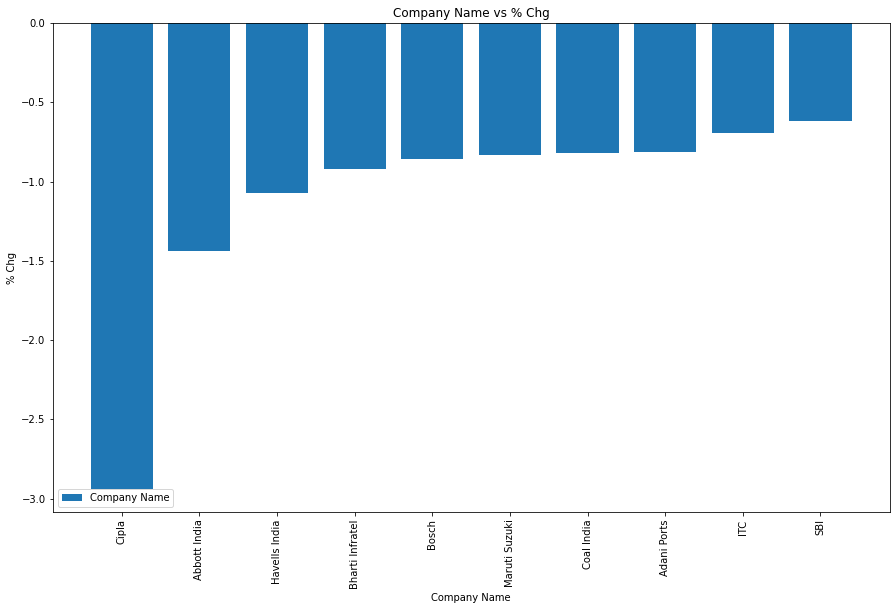

time: 808 ms


In [22]:
def positive_percent_change(df):
  positive_change_df = df.where(df[cols[2]]>0)
  positive_change_df.dropna(inplace=True)
  positive_change_df = positive_change_df.sort_values(cols[2],ascending=False).head(10)
  plot_bar(positive_change_df, cols[0],cols[2])

positive_percent_change(df)

def negative_percent_change(df):
  negative_change_df = df.where(df[cols[2]]<=0)
  negative_change_df.dropna(inplace=True)
  negative_change_df = negative_change_df.sort_values(cols[2],ascending=True).head(10)
  plot_bar(negative_change_df,cols[0],cols[2])

negative_percent_change(df)

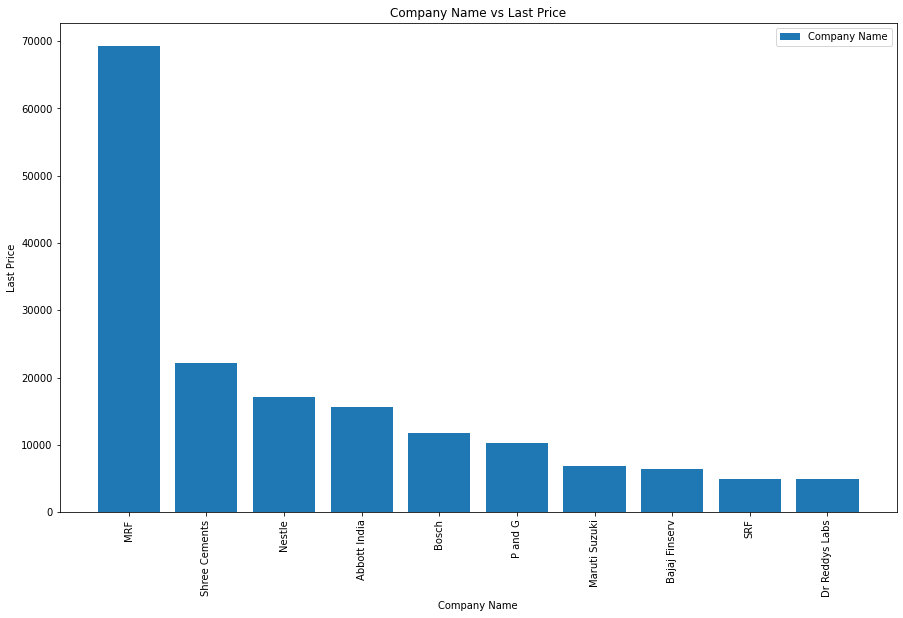

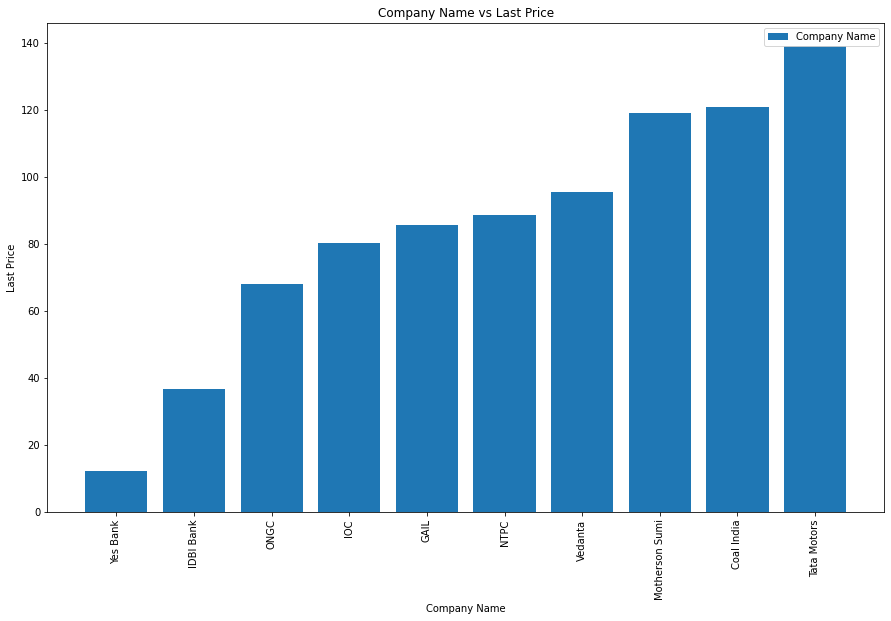

time: 911 ms


In [23]:
def highest_last_price(df):
  highest_last_price_df = df.sort_values(cols[1],ascending=False).head(10)
  plot_bar(highest_last_price_df,cols[0],cols[1])

highest_last_price(df)

def lowest_last_price(df):
  lowest_last_price_df = df.sort_values(cols[1],ascending=True).head(10)
  plot_bar(lowest_last_price_df,cols[0],cols[1])

lowest_last_price(df)

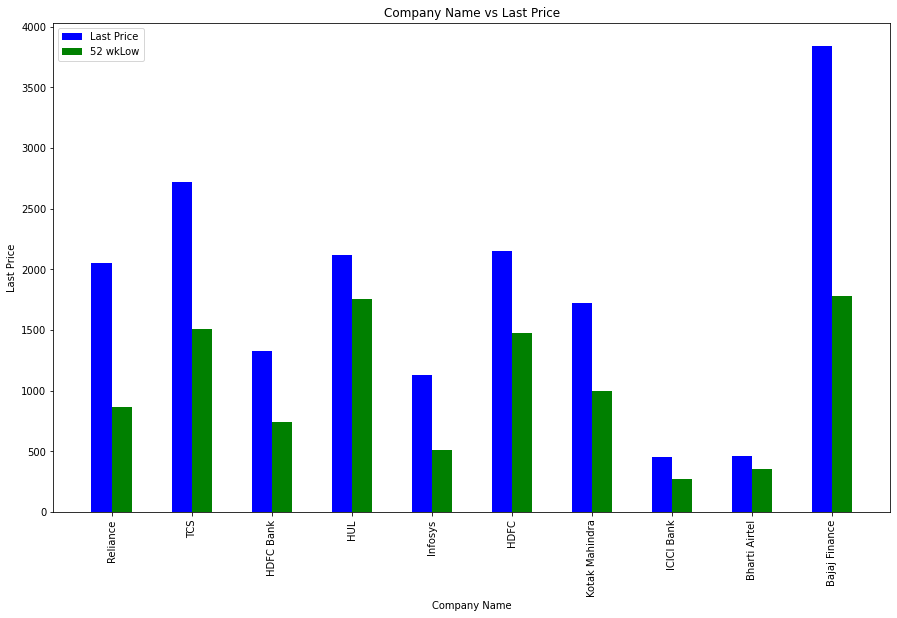

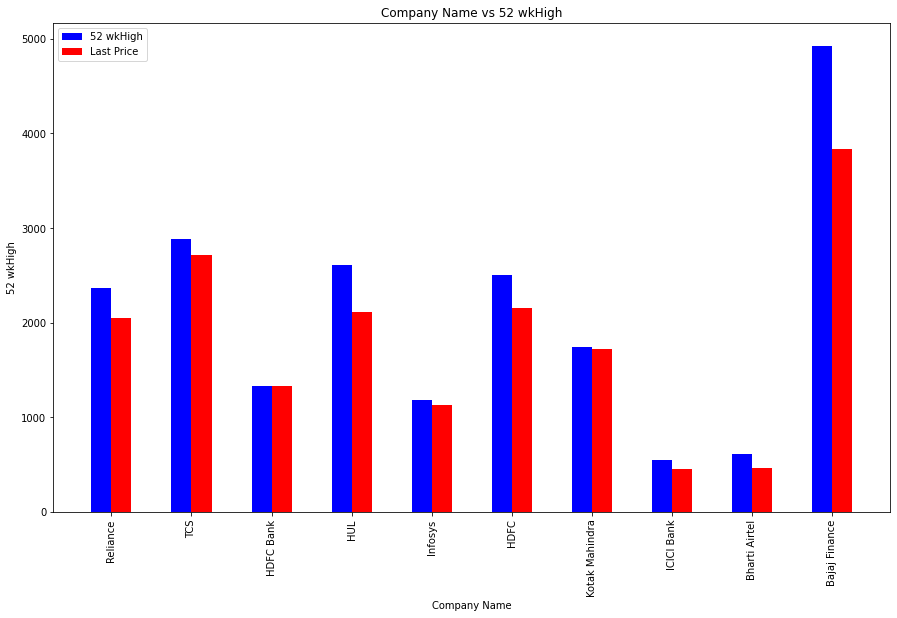

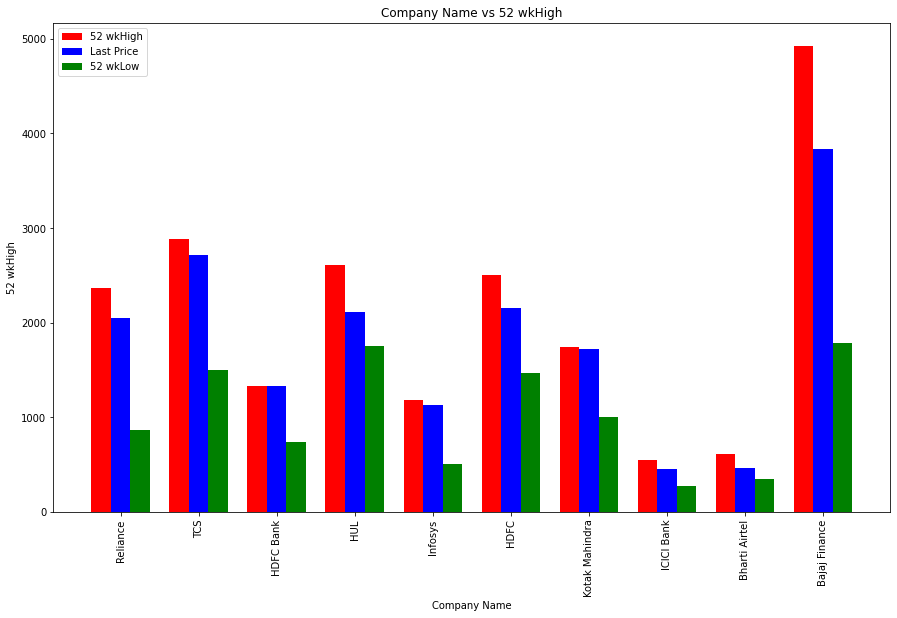

time: 1.35 s


In [24]:
def plot_bar_2(df,param_1,param_2,param_3,color):
  labels = df[param_1]
  df= df.head(10)
  plt.figure(figsize = (15,9))
  plt.xlabel(f'{param_1}')
  plt.ylabel(f'{param_2}')
  plt.title(f'{param_1} vs {param_2}')
  plt.bar([i for i,_ in enumerate(df[param_1])], df[param_2], color = 'Blue', width = 0.25)
  plt.bar([i + 0.25 for i,_ in enumerate(df[param_1])], df[param_3], color = color, width = 0.25)
  plt.xticks([i + 0.125 for i,_ in enumerate(df[param_1])],labels=labels,rotation='90')
  plt.legend(labels = [param_2,param_3]) 

  plt.savefig(f'Plots/{param_1}_{param_2}_{param_3}')

plot_bar_2(df,cols[0],cols[1],cols[4],'Green')
plot_bar_2(df,cols[0],cols[3],cols[1],'Red')

def plot_bar_3(df,param_1,param_2,param_3,param_4):
  labels = df[param_1]
  df= df.head(10)
  plt.figure(figsize = (15,9))
  plt.xlabel(f'{param_1}')
  plt.ylabel(f'{param_2}')
  plt.title(f'{param_1} vs {param_2}')
  plt.bar([i for i,_ in enumerate(df[param_1])], df[param_2], color = 'Red', width = 0.25)
  plt.bar([i + 0.25 for i,_ in enumerate(df[param_1])], df[param_3], color = 'Blue', width = 0.25)
  plt.bar([i + 0.5 for i,_ in enumerate(df[param_1])], df[param_4], color = 'Green', width = 0.25)
  plt.xticks([i + 0.25 for i,_ in enumerate(df[param_1])],labels=labels,rotation='90')
  plt.legend(labels = [param_2,param_3,param_4]) 

  plt.savefig(f'Plots/{param_1}_{param_2}_{param_3}_{param_4}')


plot_bar_3(df,cols[0],cols[3],cols[1],cols[4])
